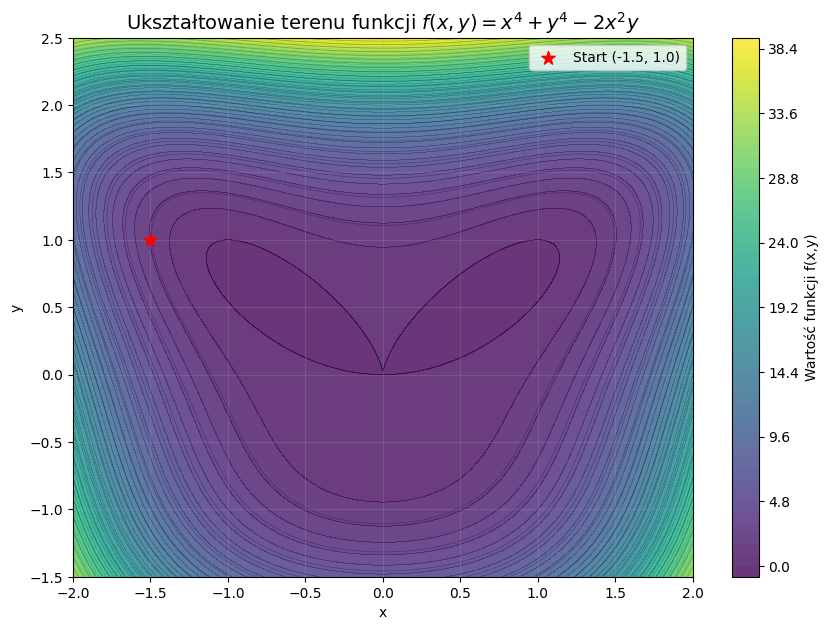

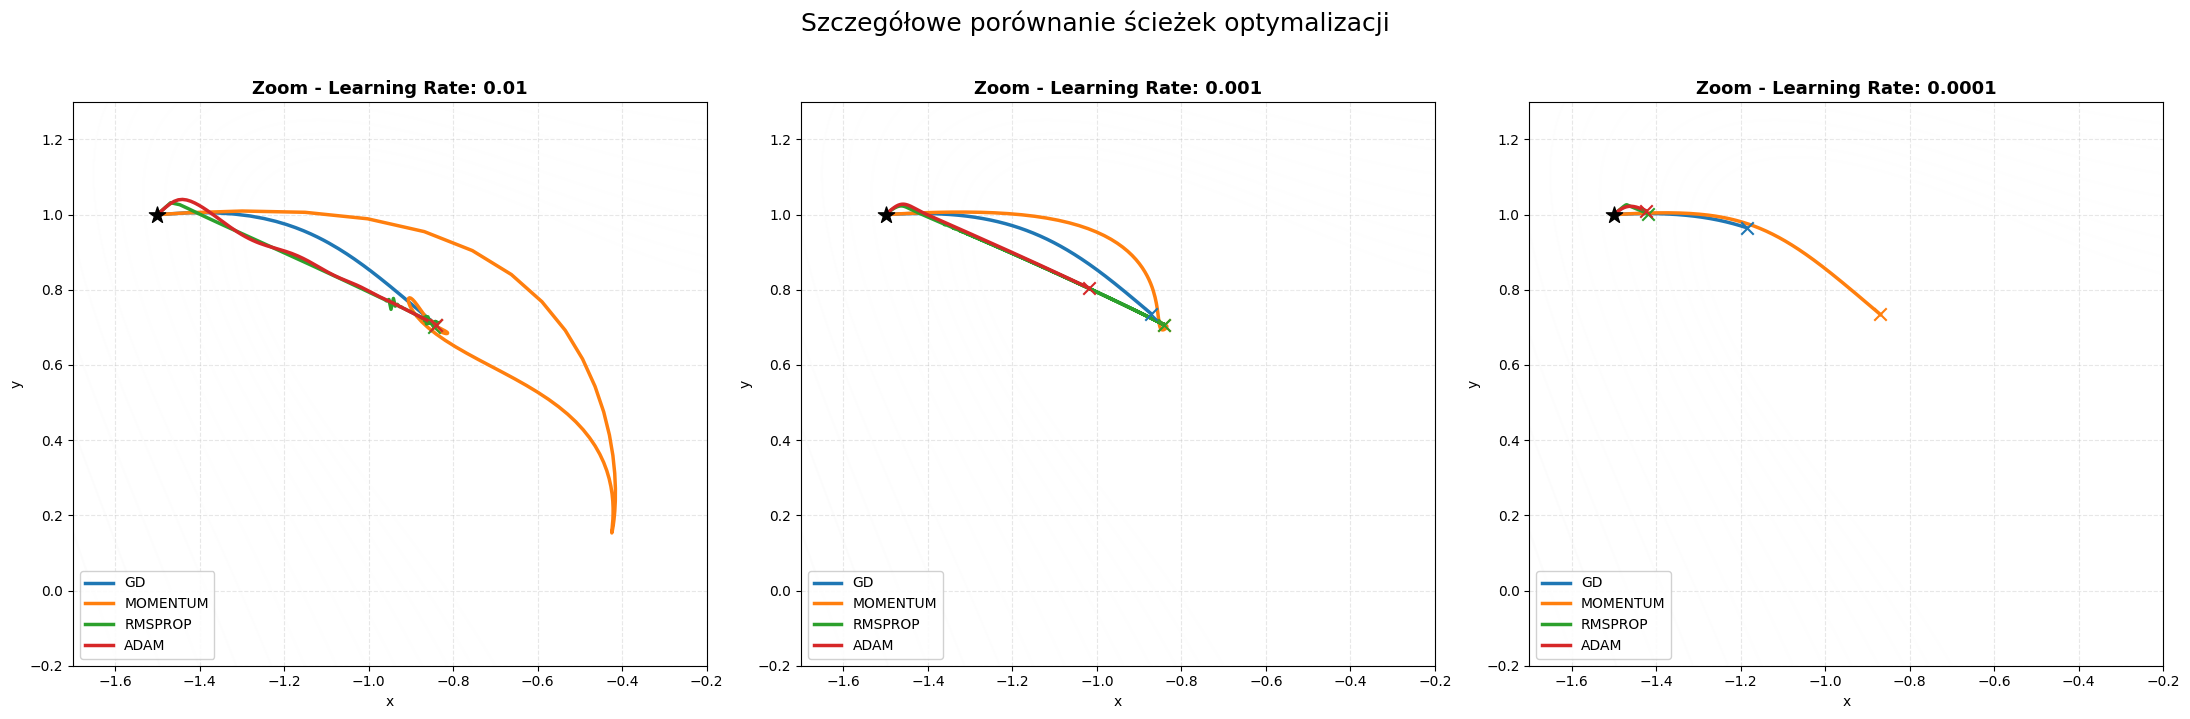

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_func(x, y):
    return x**4 + y**4 - 2*(x**2)*y

def target_grad(x, y):
    dx = 4*x**3 - 4*x*y
    dy = 4*y**3 - 2*x**2
    return np.array([dx, dy])

def optimize_path(opt_name, start_pos, lr, steps=500):
    path = [start_pos.copy()]
    pos = start_pos.copy()
    v, s, m = np.zeros(2), np.zeros(2), np.zeros(2)
    gamma, rho, beta1, beta2, eps = 0.9, 0.9, 0.9, 0.999, 1e-8
    
    for t in range(1, steps + 1):
        grad = target_grad(pos[0], pos[1])
        if opt_name == 'gd': pos = pos - lr * grad
        elif opt_name == 'momentum':
            v = gamma * v + lr * grad
            pos = pos - v
        elif opt_name == 'rmsprop':
            s = rho * s + (1 - rho) * (grad**2)
            pos = pos - (lr / (np.sqrt(s) + eps)) * grad
        elif opt_name == 'adam':
            m = beta1 * m + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * (grad**2)
            m_corr = m / (1 - beta1**t)
            s_corr = s / (1 - beta2**t)
            pos = pos - (lr * m_corr / (np.sqrt(s_corr) + eps))
        path.append(pos.copy())
    return np.array(path)

learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['gd', 'momentum', 'rmsprop', 'adam']
colors = {'gd': '#1f77b4', 'momentum': '#ff7f0e', 'rmsprop': '#2ca02c', 'adam': '#d62728'}
start_position = np.array([-1.5, 1.0])

x_range = np.linspace(-2, 2, 500)
y_range = np.linspace(-1.5, 2.5, 500)
X, Y = np.meshgrid(x_range, y_range)
Z = target_func(X, Y)


plt.figure(figsize=(10, 7))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(cp, label='Wartość funkcji f(x,y)')
plt.contour(X, Y, Z, levels=30, colors='black', linewidths=0.5, alpha=0.3)
plt.scatter(start_position[0], start_position[1], color='red', s=100, marker='*', label='Start (-1.5, 1.0)', zorder=5)
plt.title("Ukształtowanie terenu funkcji $f(x,y) = x^4 + y^4 - 2x^2y$", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(22, 7))

for i, lr in enumerate(learning_rates):
    ax = axes[i]
    ax.contour(X, Y, Z, levels=np.logspace(-2, 2, 40), cmap='binary', alpha=0.15)
    
    for opt in optimizers:
        path = optimize_path(opt, start_position, lr=lr, steps=800)
        ax.plot(path[:, 0], path[:, 1], label=f'{opt.upper()}', color=colors[opt], linewidth=2.5, zorder=5)
        ax.scatter(path[-1, 0], path[-1, 1], color=colors[opt], s=80, marker='x', zorder=6)

    ax.scatter(start_position[0], start_position[1], color='black', s=150, marker='*', zorder=10)
    
    ax.set_title(f'Zoom - Learning Rate: {lr}', fontsize=13, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='lower left', framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.3)
    
    ax.set_xlim(-1.7, -0.2)
    ax.set_ylim(-0.2, 1.3)

plt.suptitle("Szczegółowe porównanie ścieżek optymalizacji", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

print("Wczytywanie danych MNIST...")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    
    layers.Dense(128, activation='relu'),      
    layers.Dropout(0.2),                      
    layers.Dense(64, activation='relu'),      
    layers.Dense(10, activation='softmax')     
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(x_train, y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])


test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nDokładność na zbiorze testowym: {test_acc*100:.2f}%')

Wczytywanie danych MNIST...

Rozpoczynanie treningu. Logi TensorBoard będą zapisywane w: logs/fit/20260113-181157
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9143 - loss: 0.2887 - val_accuracy: 0.9589 - val_loss: 0.1298
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9585 - loss: 0.1368 - val_accuracy: 0.9644 - val_loss: 0.1043
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9675 - loss: 0.1053 - val_accuracy: 0.9709 - val_loss: 0.0935
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9714 - loss: 0.0910 - val_accuracy: 0.9765 - val_loss: 0.0754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0750 - val_accuracy: 0.9754 - val_loss: 0.0817
313/313 - 1s - 2ms/step - accuracy: 0.9754 - loss: 0.0817

Dokładność na zbiorze testowym: 97.54%
